In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import geopandas as gpd
import rioxarray

In [3]:
def centroids(ds):
    max_precip=ds.max(dim="time",skipna=True)
    min_precip=ds.min(dim="time",skipna=True)
    a = (ds - min_precip+0.0000001)/(max_precip - min_precip+0.0000001)
    y = a.lat.dot(a.fillna(0) , dims=["lon","lat"])/ a.fillna(0).sum(skipna=True , dim=["lat","lon"])
    x = a.lon.dot(a.fillna(0) , dims=["lon","lat"])/ a.fillna(0).sum(skipna=True , dim=["lat","lon"])
    return (x.values,y.values)


In [4]:
ds = xr.open_mfdataset("/mnt/d/UGP/datasets/full_data_daily_v2020_10_2000.nc").sel(lat = slice(5,45) , lon = slice(65,100))
ds = ds.precip.rio.set_crs(4326)
sf = gpd.read_file('/mnt/d/UGP/datasets/hydrosheds_India.shp')

In [5]:
x,y = centroids(ds)

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


In [41]:
def make_figure():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
    plt.ylim(5,45)
    plt.xlim(65,100)
    
    # generate a basemap with oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    return fig, ax

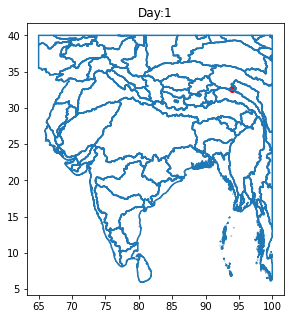

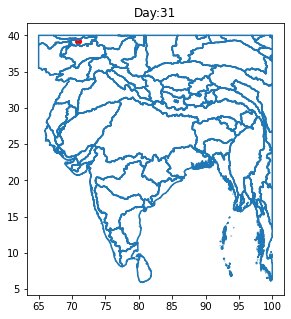

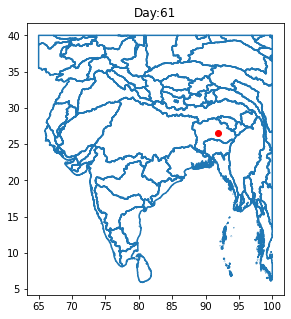

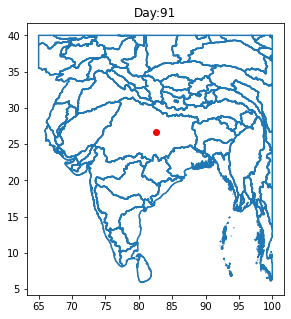

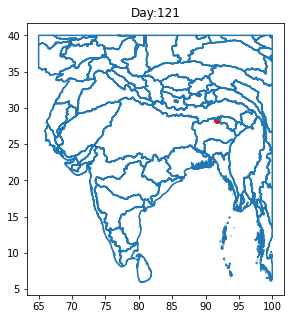

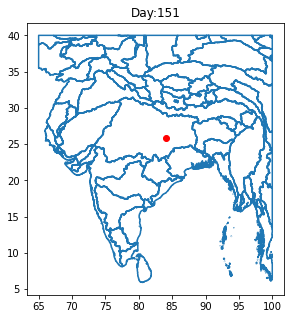

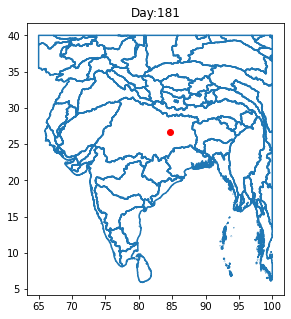

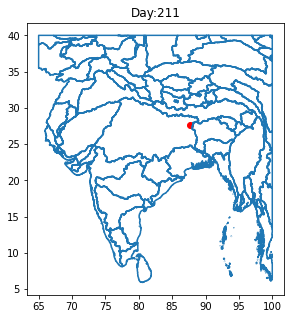

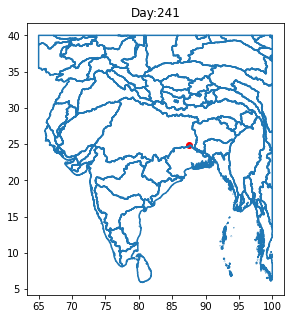

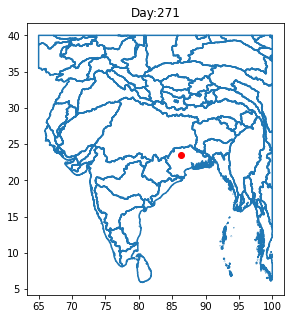

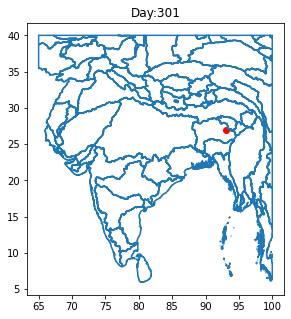

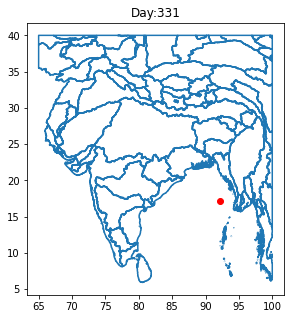

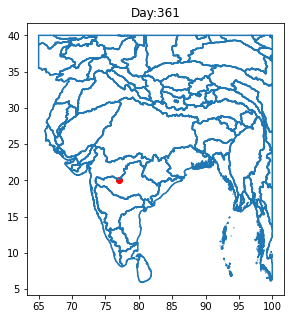

In [52]:
for i in range(0,len(x),30):
#     _, ax = make_figure()
#     plt.figure()
    sf.boundary.plot(figsize=(10, 5))
    plt.scatter(x[i],y[i],c='r')
    plt.title("Day:" + str(i+1))
    plt.show()

In [31]:
# fig, ax = make_figure()

# frames = len(x)

# def draw(frame):
#     plot = ax.scatter(x[frame],y[frame])
#     ax.set_title("Day:" + str(frame+1))
#     return plot


# def init():
#     return draw(0)


# def animate(frame):
#     return draw(frame)


# ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
# plt.close(fig)

In [8]:
# ani.save('precip.mp4', writer=animation.FFMpegWriter(fps=5))

In [46]:
xs=[]
ys=[]
for index, row in sf.iterrows():
    x1,y1 = centroids(ds.rio.clip(row, sf.crs, drop=False))
    xs.append(x1)
    ys.append(y1)

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040578830 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040548370 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040007850 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or e

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040783120 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040748310 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040017030 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040022790 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040022790 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040023060 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040023060 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040023210 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn(

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040023230 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040023820 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040023820 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040025450 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040025450 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040975150 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040025450 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040960480 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040975150 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040865800 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040960200 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040838850 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040865930 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040027100 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040027780 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040027950 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040028770 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040031750 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040031830 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040032420 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040032420 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040032890 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040033440 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040879050 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040033640 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040794590 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040879050 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040033640 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or e

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040648310 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040794590 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040033640 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or e

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040607420 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040648320 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040048470 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040048470 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050210 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050210 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040416430 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040449990 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040438030 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040416190 at index 1 will not be rasterized.
  warni

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040462930 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040438030 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050210 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or e

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040484700 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040482720 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4049000030 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or e

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040545690 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040484760 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050240 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4049000030 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.p

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050280 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050370 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050370 at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shap

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4049001000 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn(

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4049001800 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050700 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050810 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050910 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4049000880 at index 1 will not be rasterized.
  warni

/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 4040050980 at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape 0 at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/rghoshal/anaconda3/envs/ugp/lib/python3.8/site-packages/rasterio/features.py:318: Sh

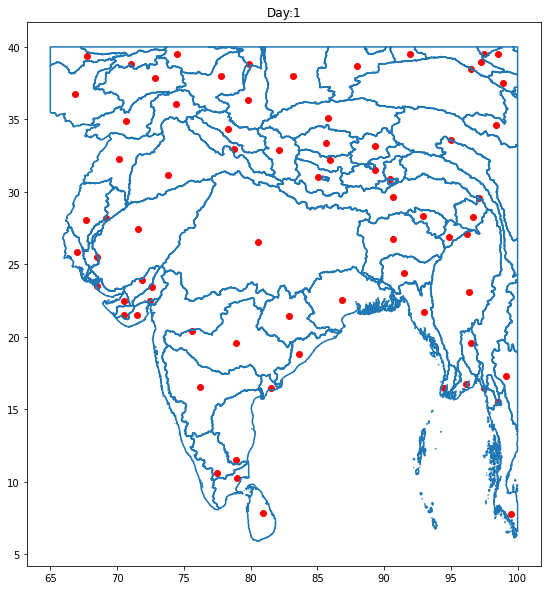

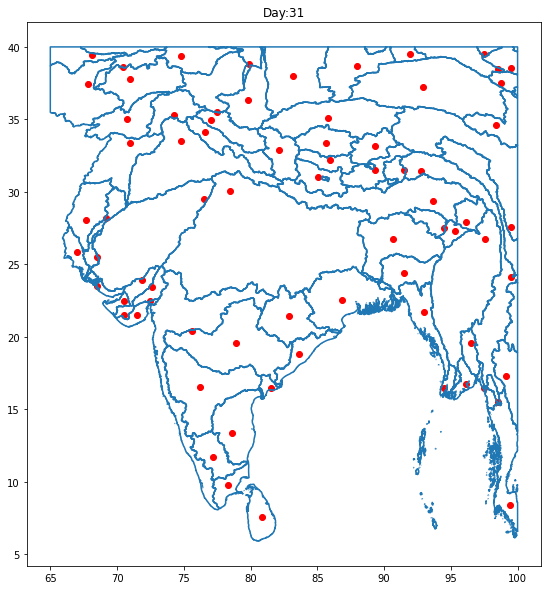

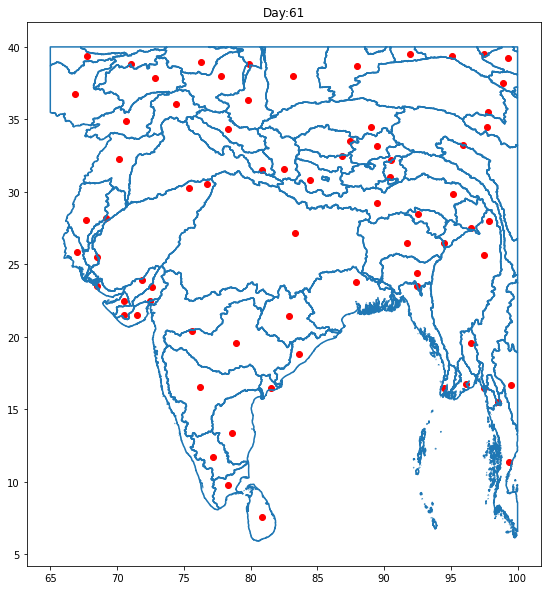

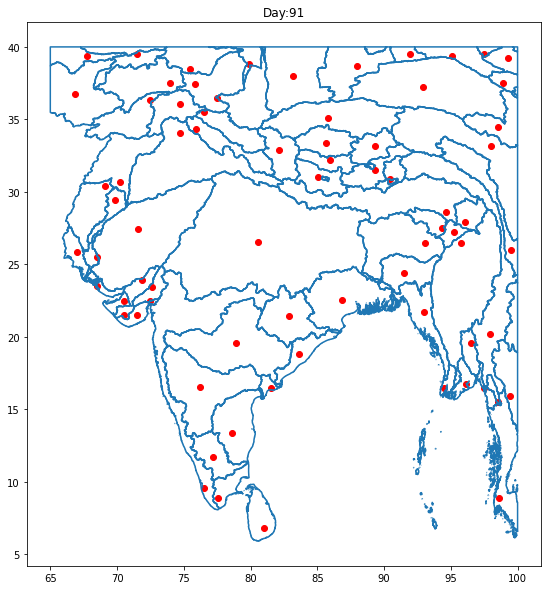

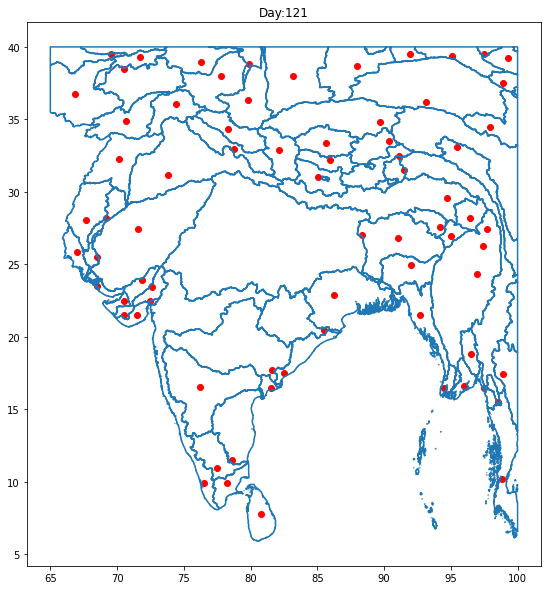

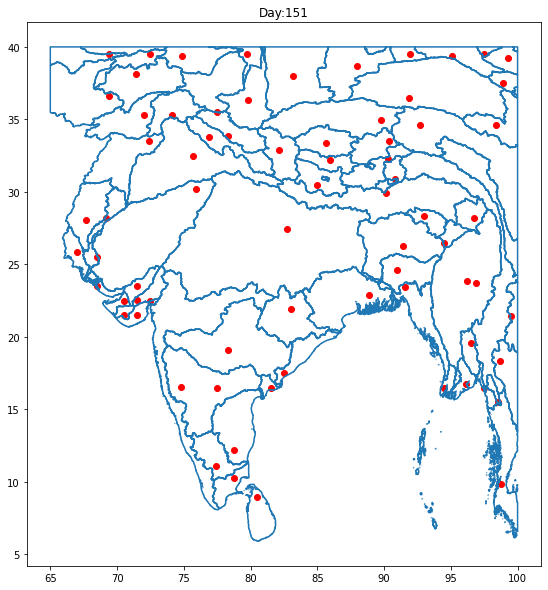

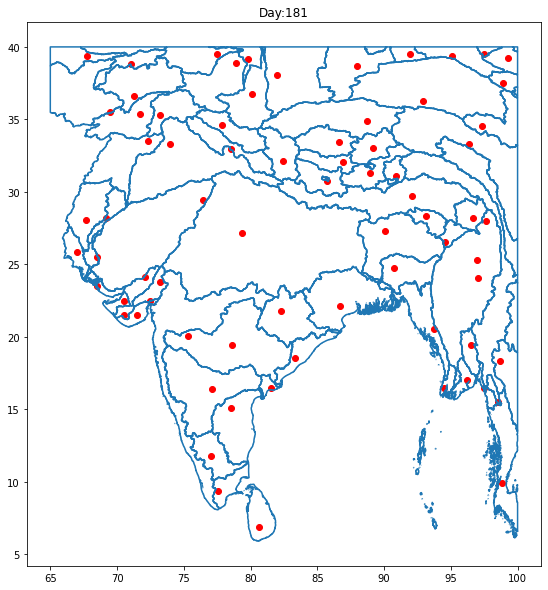

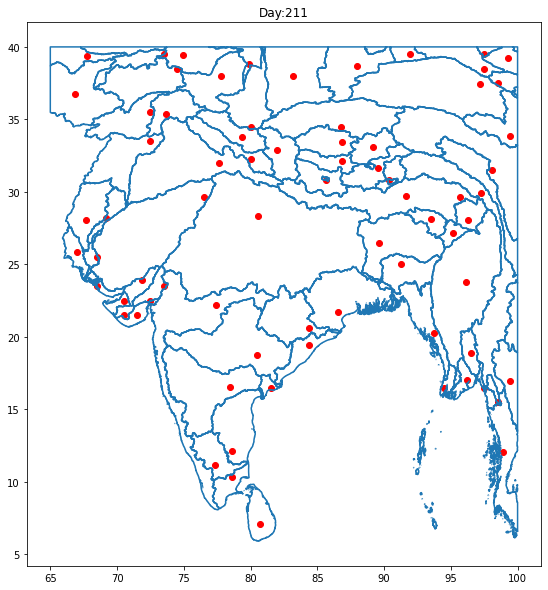

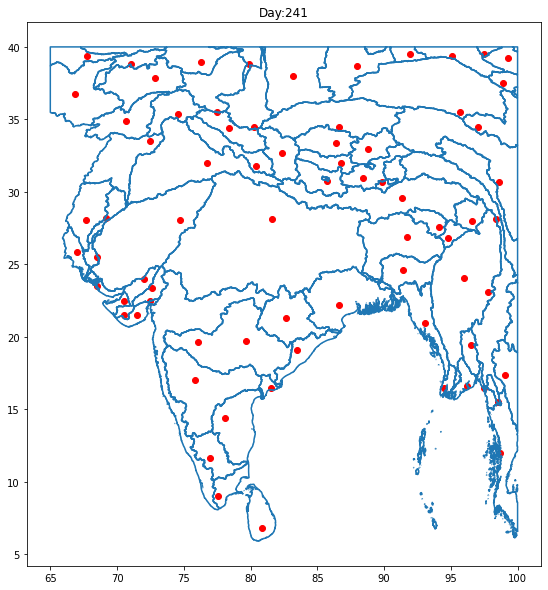

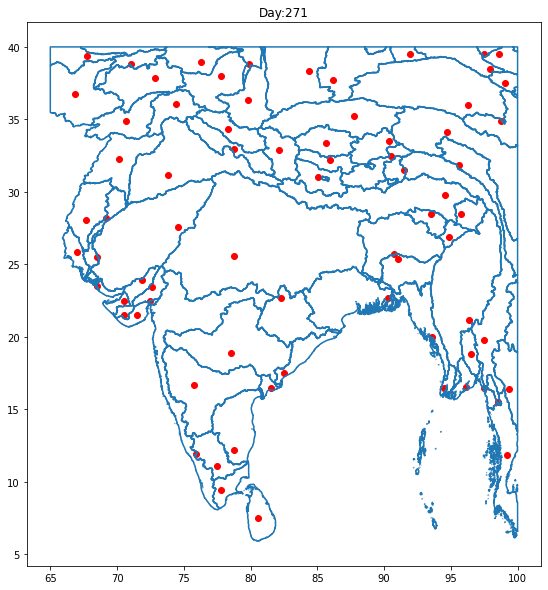

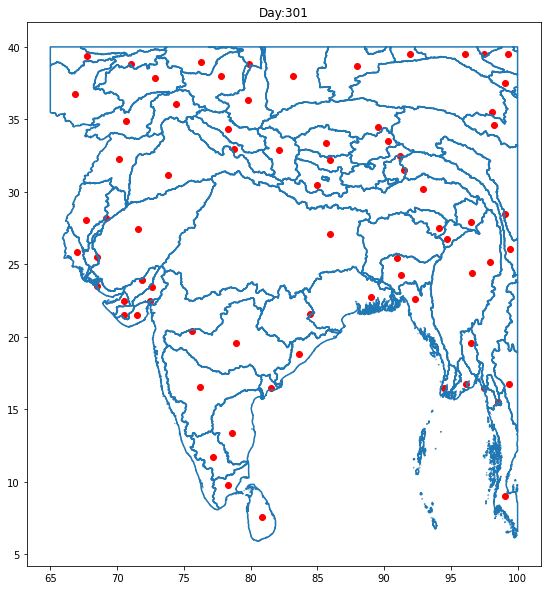

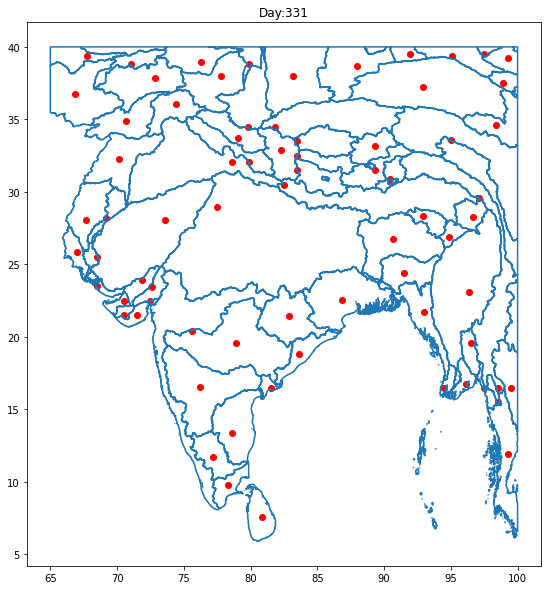

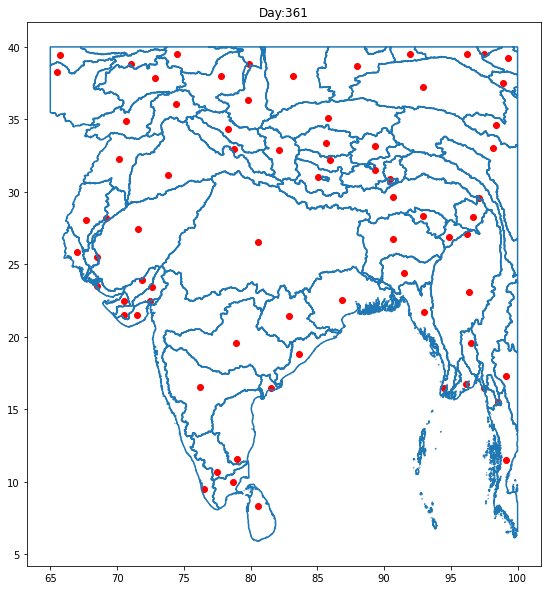

In [55]:
for i in range(0,len(x),30):
    sf.boundary.plot(figsize=(20, 10))
    for j in range(len(xs)):
        plt.scatter(xs[j][i],ys[j][i],c='r')
    plt.title("Day:" + str(i+1))
    plt.show()